Import libraries

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns
from scipy import stats
import scipy.cluster.hierarchy as hac
from statistics import mean 
#import scipy.stats.spearmanr as spearman

Read dataset

In [2]:
path = "./data/Notificaciones/"
filename_read = os.path.join(path,"normalizado.csv")
notificaciones = pd.read_csv(filename_read,delimiter=",",engine='python')
notificaciones

,Unnamed: 0,anio,casos,distrito_nombre,distrito_notif,incidencia,semana,0
0,0,2009.0,0.0,LOMA PLATA,0,0.000000,1.0,NaN
1,1,2009.0,0.0,LOMA PLATA,0,0.000000,2.0,NaN
2,2,2009.0,0.0,LOMA PLATA,0,0.000000,3.0,NaN
3,3,2009.0,0.0,LOMA PLATA,0,0.000000,4.0,NaN
4,4,2009.0,0.0,LOMA PLATA,0,0.000000,5.0,NaN
5,5,2009.0,1.0,LOMA PLATA,LOMA PLATA,0.006331,6.0,NaN
6,6,2009.0,0.0,LOMA PLATA,0,0.000000,7.0,NaN
7,7,2009.0,0.0,LOMA PLATA,0,0.000000,8.0,NaN
8,8,2009.0,0.0,LOMA PLATA,0,0.000000,9.0,NaN
9,9,2009.0,0.0,LOMA PLATA,0,0.000000,10.0,NaN


Check if all time series has the same length

In [4]:
noti=notificaciones['distrito_nombre'].value_counts() 
noti.sort_values

<bound method Series.sort_values of SAN PEDRO DEL PARANA     265
CECILIO BAEZ             265
MINGA PORA               265
MINGA GUAZU              265
CORPUS CHRISTI           265
ITAUGUA                  265
R I 3 CORRALES           265
LIMPIO                   265
JUAN LEON MALLORQUIN     265
NUEVA LONDRES            265
ITAPUA POTY              265
QUIINDY                  265
NUEVA ESPERANZA          265
CAAGUAZU                 265
UNION                    265
RAUL ARSENIO OVIEDO      265
CARLOS ANTONIO LOPEZ     265
ALTOS                    265
GENERAL DIAZ             265
SANTA ELENA              265
PIRIBEBUY                265
HORQUETA                 265
NARANJAL                 265
MCAL. ESTIGARRIBIA       265
FERNANDO DE LA MORA      265
CAPIIBARY                265
KATUETE                  265
ITA                      265
REPATRIACION             265
LOMA GRANDE              265
                        ... 
SAN JUAN DEL PARANA      265
CHACO                    265
TOMAS R

Data preparation and clustering

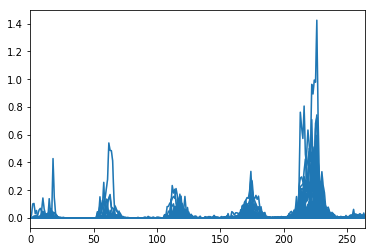

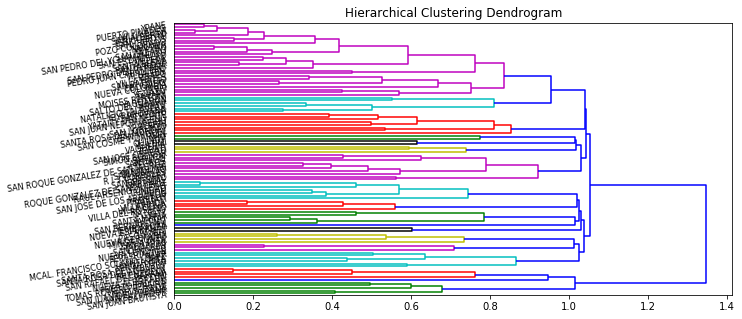

In [46]:
timeSeries = pd.DataFrame()
for muni in listaMunicp:
    municipio=notificaciones['distrito_nombre']==muni
    notif_x_municp=notificaciones[municipio]
    notif_x_municp = notif_x_municp.reset_index(drop=True)
    notif_x_municp = notif_x_municp['incidencia']
    #notif_x_municp.replace([np.inf, -np.inf], np.nan)
    #print("Infinitos ",np.isfinite(notif_x_municp).all())
    #notif_x_municp.replace(r'^\s', 0.0, regex=True)
    #notif_x_municp.fillna(0)
    #notif_x_municp.replace(np.nan, 0.0)
    notif_x_municp = notif_x_municp.replace('nan', np.nan).fillna(0.000001)
    notif_x_municp = notif_x_municp.replace([np.inf, -np.inf], np.nan).fillna(0.000001)
    #notif_x_municp = notif_x_municp.apply(lambda x: x.str.strip()).replace('', 0.0)
    #print("Nulos ",notif_x_municp.isna().sum(),muni)
    #np.array(notif_x_municp)
    #df = pd.DataFrame(notif_x_municp)
    timeSeries = timeSeries.append(notif_x_municp)
    #print(notif_x_municp.shape)
    #print(muni)
    #print(notif_x_municp)
    ax = sns.tsplot(ax=None, data=notif_x_municp.values, err_style="unit_traces")

plt.show()
# Here we use  correlation
def my_metric(x, y):
    #r = stats.pearsonr(x, y)[0]
    #return 1 - r # correlation to distance: range 0 to 2
    r=np.dot(x-mean(x),y-mean(y))/((np.linalg.norm(x-mean(x)))*(np.linalg.norm(y-mean(y))))
    if math.isnan(r):
        r=0
    #print(r)
    return 1 - r
    #r=np.linalg.norm(x-y)
    #if math.isnan(r):
    #    r=1
    #print(r)
    #return r

# Do the clustering 

#print(np.isinf(timeSeries).count())
Z = hac.linkage(timeSeries.sample(100),  method='complete', metric=my_metric)

# Plot dendogram
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
#plt.xlabel('sample index')
#plt.ylabel('distance')
hac.dendrogram(
    Z,
    labels=listaMunicp,
    leaf_rotation=09.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    orientation='right'
)
plt.show()

Get elements of each cluster

217 217
Cluster 6 number of entries 27
Values Int64Index([  0,   1,   8,  13,  24,  27,  29,  33,  34,  37,  56,  78,  82,
             88, 104, 108, 110, 128, 151, 152, 175, 176, 192, 194, 203, 210,
            211],
           dtype='int64')
1RO DE MARZO
25 DE DICIEMBRE
ANTEQUERA
AYOLAS
CABALLERO ALVAREZ
CAPIIBARY
CAPITAN MEZA
CARAYAO
CARLOS ANTONIO LOPEZ
CECILIO BAEZ
EUGENIO A GARAY
ISLA PUCU
ITACURUBI DEL ROSARIO
ITURBE
LIMOY PUEBLO
LORETO
MACIEL
NUEVA GERMANIA
SAN CARLOS
SAN COSME Y DAMIAN
SANTA ROSA DEL AGUARAY
SANTA ROSA DEL MBUTUY
VALENZUELA
VILLA DEL ROSARIO
YATAITY DEL NORTE
YGUAZU
YHU
----------------------------------------------------


<Figure size 1080x360 with 0 Axes>

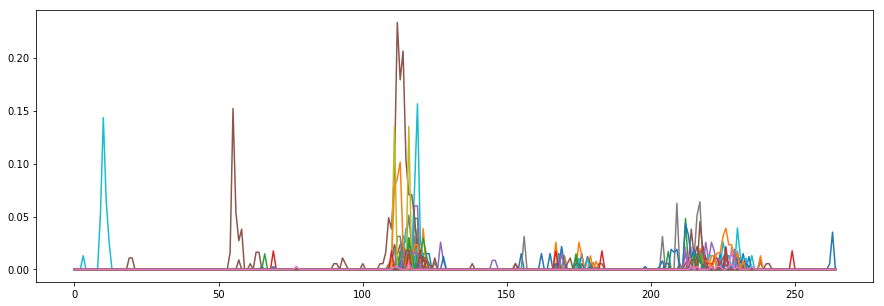

Cluster 2 number of entries 90
Values Int64Index([  2,   3,   4,   7,   9,  10,  12,  15,  17,  18,  21,  22,  23,
             25,  26,  28,  30,  31,  40,  42,  49,  50,  53,  54,  57,  58,
             60,  64,  67,  68,  71,  74,  77,  80,  81,  85,  86,  87,  89,
             90,  93,  95,  96,  97,  98, 100, 101, 106, 107, 109, 111, 117,
            118, 123, 125, 126, 127, 130, 134, 137, 138, 142, 145, 147, 149,
            150, 153, 154, 157, 161, 162, 163, 166, 171, 172, 180, 181, 182,
            184, 187, 188, 190, 195, 196, 197, 200, 208, 212, 213, 216],
           dtype='int64')
3 DE FEBRERO
ABAI
ACAHAY
ALTOS
AREGUA
ARROYOS Y ESTEROS
ATYRA
BAHIA NEGRA
BELLA VISTA
BENJAMIN ACEVAL
CAACUPE
CAAGUAZU
CAAZAPA
CAMBYRETA
CAPIATA
CAPITAN BADO
CAPITAN MIRANDA
CARAGUATAY
CHORE
COLONIA INDEPENDENCIA
DESMOCHADOS
DR BOTRELL
EMBOSCADA
ENCARNACION
EUSEBIO AYALA
FASSARDI
FERNANDO DE LA MORA
GENERAL ARTIGAS
GENERAL DELGADO
GENERAL DIAZ
GUARAMBARE
HERNANDARIAS
HUMAITA
ITA
ITACURUBI DE LA COR

<Figure size 1080x360 with 0 Axes>

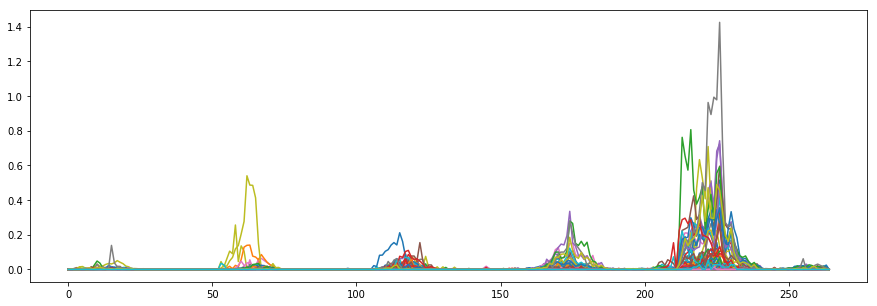

Cluster 4 number of entries 65
Values Int64Index([  5,   6,  11,  14,  16,  19,  20,  32,  36,  38,  44,  46,  47,
             48,  51,  55,  61,  62,  63,  65,  66,  69,  73,  75,  79,  83,
             92, 102, 103, 105, 115, 116, 121, 124, 129, 131, 132, 135, 136,
            140, 144, 146, 155, 156, 159, 164, 167, 168, 170, 173, 178, 179,
            183, 185, 189, 193, 198, 199, 201, 202, 204, 205, 207, 214, 215],
           dtype='int64')
ALBERDI
ALTO VERA
ASUNCION
AZOTEY
BELEN
BORJA
BUENA VISTA
CARAPEGUA
CARMEN DEL PARANA
CERRITO
CORONEL BOGADO
CORONEL OVIEDO
CORPUS CHRISTI
CURUGUATY
DR. JUAN MANUEL FRUTOS
ESCOBAR
FILADELFIA
FUERTE OLIMPO
GENERAL AQUINO
GENERAL BERNARDINO CABALLERO
GENERAL BRUGUEZ
GENERAL MORINIGO
GUAZUCUA
HOHENAU
ISLA UMBU
ITAKYRY
JUAN DE MENA
LEANDRO OVIEDO
LIMA
LIMPIO
MBOCAYATY DEL YHAGUY
MCAL. ESTIGARRIBIA
NANAWA
NATALIO
NUEVA ITALIA
OBLIGADO
PARAGUARI
PILAR
PIRAPO
PUERTO FALCON
RAUL ARSENIO OVIEDO
ROQUE GONZALEZ DE SANTA CRUZ
SAN JOAQUIN
SAN JOSE DE LOS AR

<Figure size 1080x360 with 0 Axes>

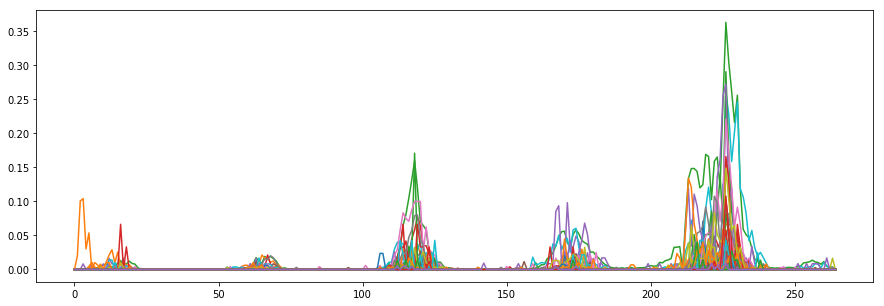

Cluster 1 number of entries 6
Values Int64Index([35, 39, 99, 139, 169, 206], dtype='int64')
CARMELO PERALTA
CHACO
LA VICTORIA
POZO COLORADO
SAN ROQUE GONZALEZ DE SANTACRUZ
YBYRAROVANA
----------------------------------------------------


<Figure size 1080x360 with 0 Axes>

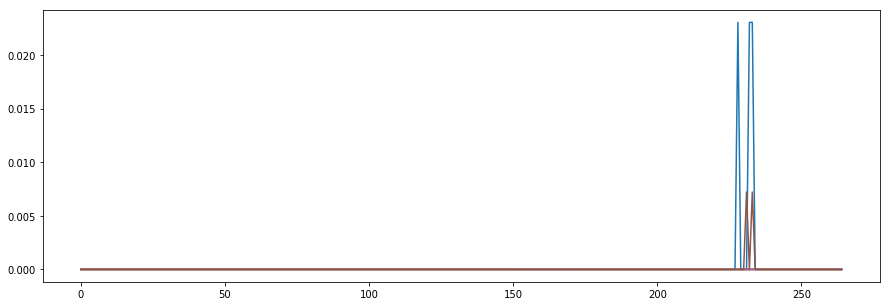

Cluster 3 number of entries 21
Values Int64Index([ 41,  43,  45,  52,  59,  72,  76,  84,  94, 112, 114, 120, 133,
            158, 160, 165, 174, 177, 186, 191, 209],
           dtype='int64')
COLONIA FRAM
CONCEPCION
CORONEL MARTINEZ
EDELIRA
FELIX PEREZ CARDOZO
GUAYAIBI
HORQUETA
ITANARA
JUAN EULOGIO ESTIGARRIBIA
MAURICIO JOSE TROCHE
MBOCAYATY
MOISES BERTONI
PASO YOBAI
SAN JUAN BAUTISTA
SAN JUAN NEPOMUCENO
SAN PEDRO
SANTA ROSA
SANTA ROSA DEL MONDAY
TEBICUARYMI
UNION
YGATIMI
----------------------------------------------------


<Figure size 1080x360 with 0 Axes>

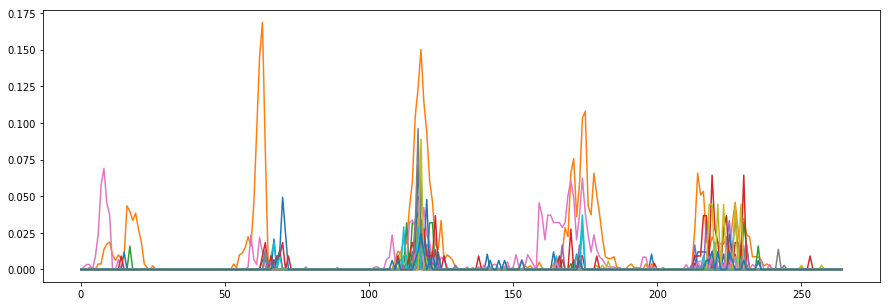

Cluster 5 number of entries 8
Values Int64Index([70, 91, 113, 119, 122, 141, 143, 148], dtype='int64')
GENERAL RESQUIN
JOSE DOMINGO OCAMPOS
MBARACAYU
MINGA PORA
NARANJAL
PUERTO PINASCO
R I 3 CORRALES
SAN ALBERTO
----------------------------------------------------


<Figure size 1080x360 with 0 Axes>

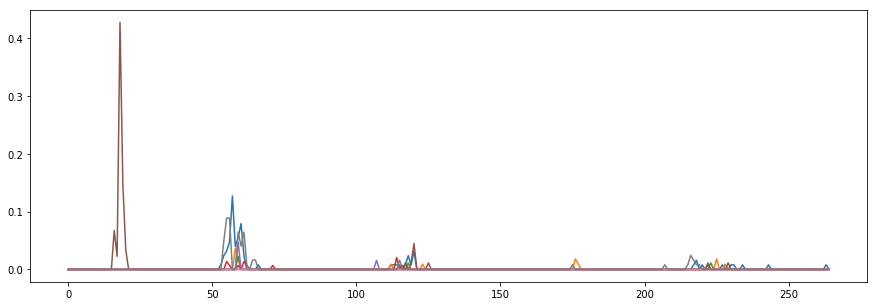

----------------------------------------------------


In [37]:
from scipy.cluster.hierarchy import fcluster


def print_clusters(timeSeries, Z, k, plot=False):
    # k Number of clusters I'd like to extract
    #MR = np.amax(valor)*0.6
    #print("MR",MR.max())
    results = fcluster(Z, 6, criterion='maxclust')
    #results = fcluster(Z, k,criterion='maxclust_monocrit', monocrit=MR)
    #results = fcluster(Z, k*MR, criterion='monocrit', monocrit=MR)

    # check the results
    s = pd.Series(results)
    clusters = s.unique()
    
    mylista = []
    for i in range(0,217):
        mylista.append(i)
    mylist = np.array(mylista)
    print(len(mylist),len(listaMunicp))
    labels=np.stack((mylist, listaMunicp), axis=-1)

    for c in clusters:
        cluster_indeces = s[s==c].index
        print("Cluster %d number of entries %d" % (c, len(cluster_indeces))) 
        print("Values",cluster_indeces)
        for j in range(0,len(cluster_indeces)):
            for k in mylist:
                #print(cluster_indeces[j])
                #print(labels[k,0])
                if cluster_indeces[j]==int(labels[k,0]):
                    etiqueta=labels[k,1]
                    print(etiqueta)
        print("----------------------------------------------------")
        if plot:
            plt.figure(figsize=(15,5))
            timeSeries.T.iloc[:,cluster_indeces].plot(legend=None,figsize=(15,5))
            plt.xlabel="Weeks"
            plt.ylabel="Incidence"
            #ax.get_legend().remove()
            #plt.gca.legend_ =None
            #sns.heatmap(timeSeries.T.iloc[:,cluster_indeces])
            #plt.legend()
            plt.show()
            
    print("----------------------------------------------------")

print_clusters(timeSeries, Z, 24, plot=True)